In [1]:
from pathlib import Path
import pprint
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

In [2]:
import wandb
api = wandb.Api()

run = api.run("andrinburli/jass-mu-zero/runs/32y2d2zj")


metrics = {
    "apa_dmcts": [],
    "apa_dmcts_raw_policy": [],
    "apa_dpolicy": [],
    "apa_random": []
}

history = run.scan_history()
i = 0 
for row in history:
    print(f"processed {i}", end="\r")
    for k in metrics:
        metrics[k].append(row[k])
    i += 1

In [3]:
df = pd.DataFrame(metrics)[:100000]
df.head()

,apa_dmcts,apa_dmcts_raw_policy,apa_dpolicy,apa_random
0,0.245223,0.227707,0.441083,0.394904
1,0.245223,0.227707,0.441083,0.394904
2,0.245223,0.227707,0.441083,0.394904
3,0.245223,0.227707,0.441083,0.394904
4,0.245223,0.227707,0.441083,0.394904


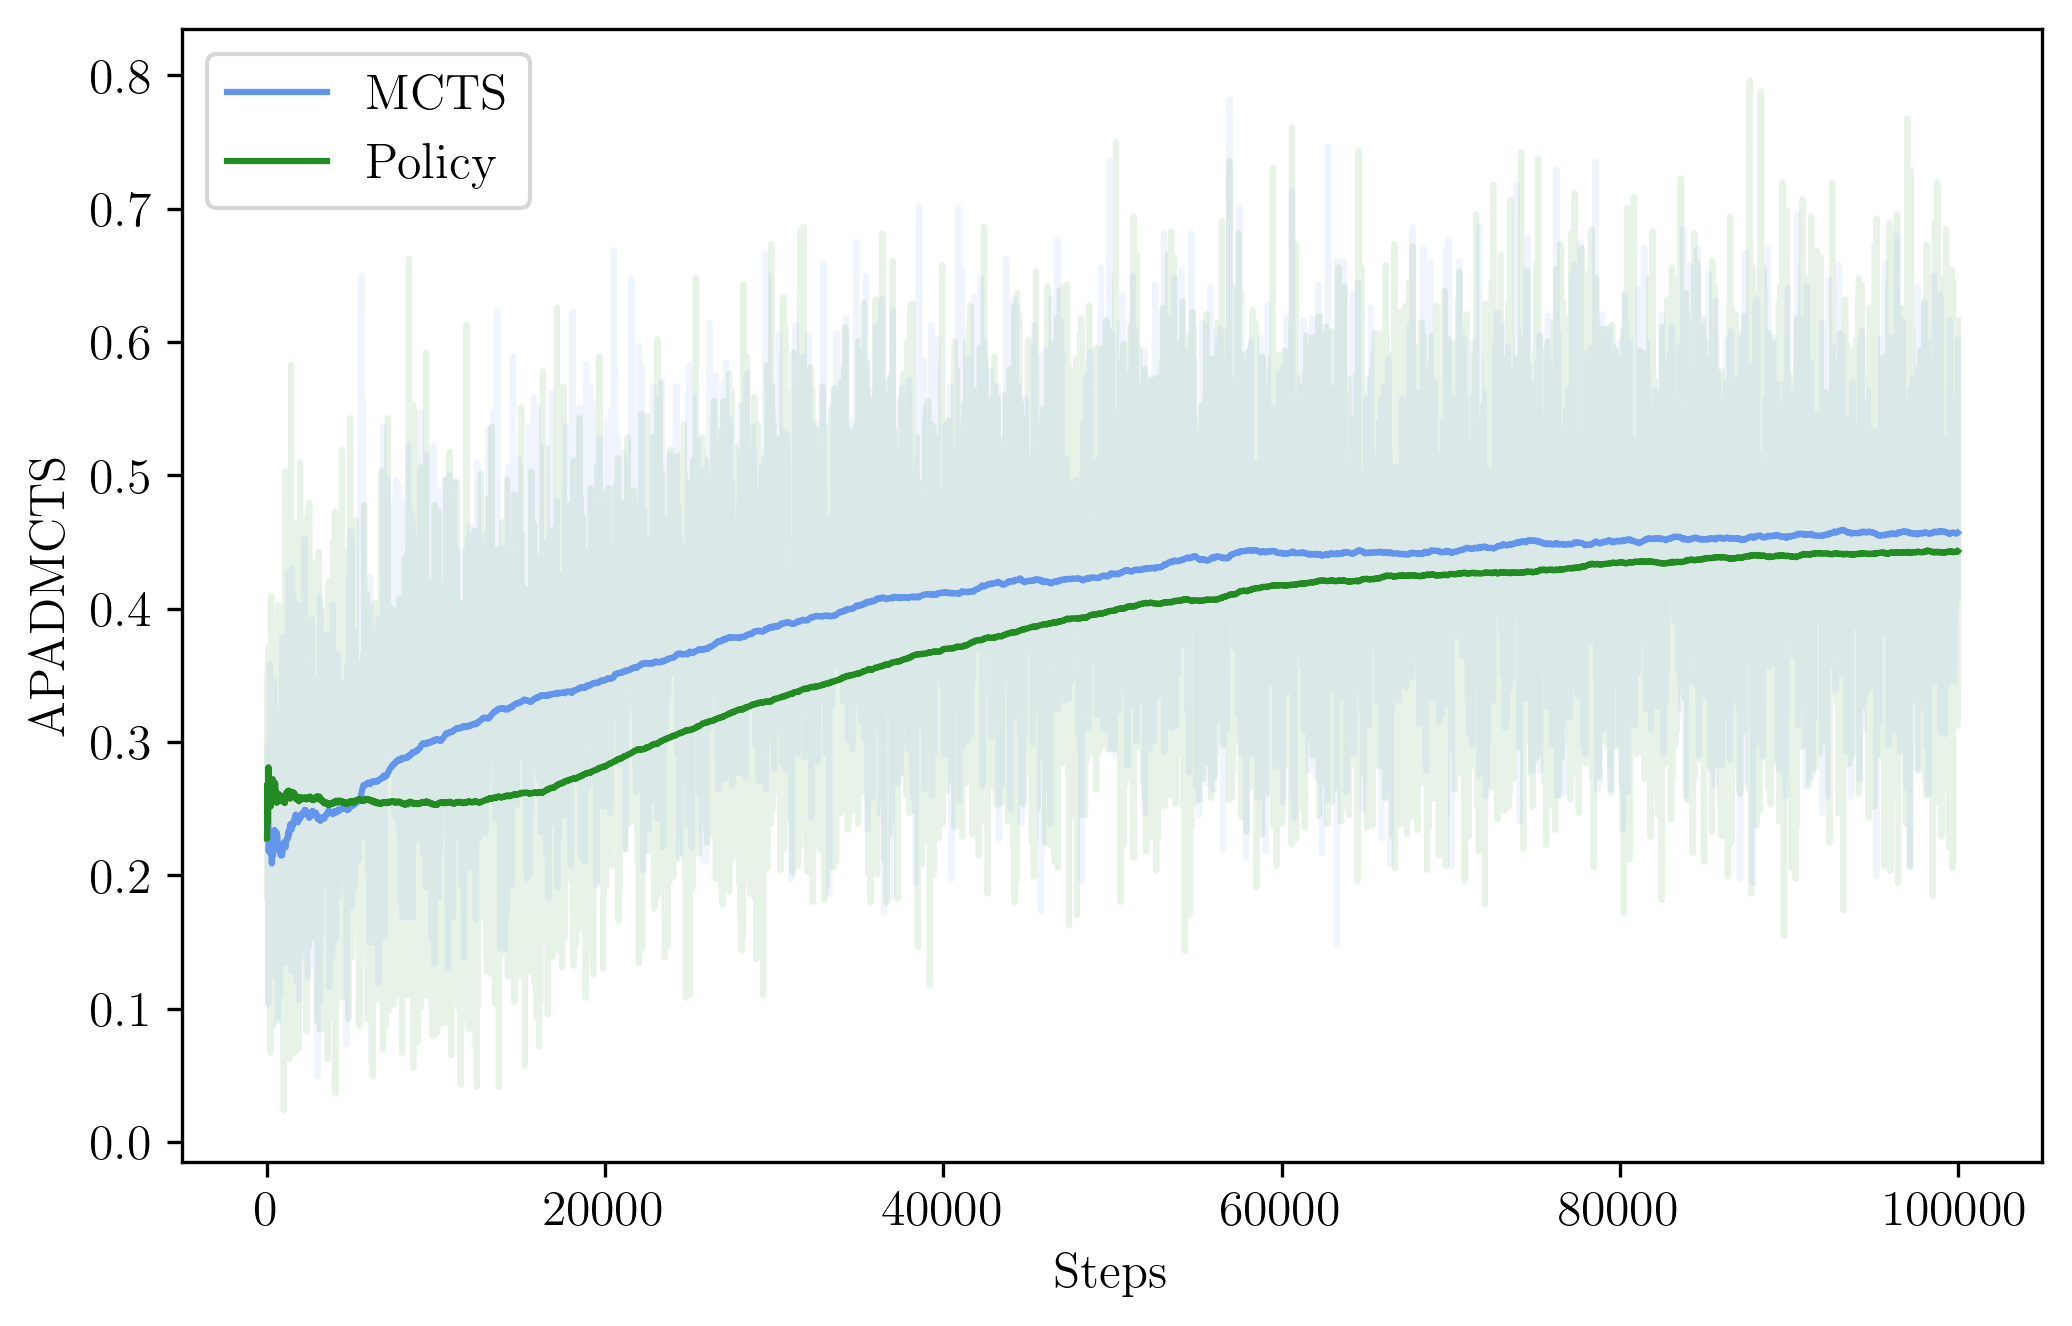

In [4]:
plt.figure(dpi=300, figsize=(8, 5))


df.apa_dmcts_raw_policy.plot(alpha=0.1, c="forestgreen", label='')
df.apa_dmcts.plot(alpha=0.1, c="cornflowerblue", label='')

df.apa_dmcts.ewm(alpha=0.0001, adjust=True).mean().plot(c="cornflowerblue", label='MCTS')
df.apa_dmcts_raw_policy.ewm(alpha=0.0001, adjust=True).mean().plot(c="forestgreen", label='Policy')

plt.xlabel("Steps"), plt.ylabel("APADMCTS")
plt.legend()

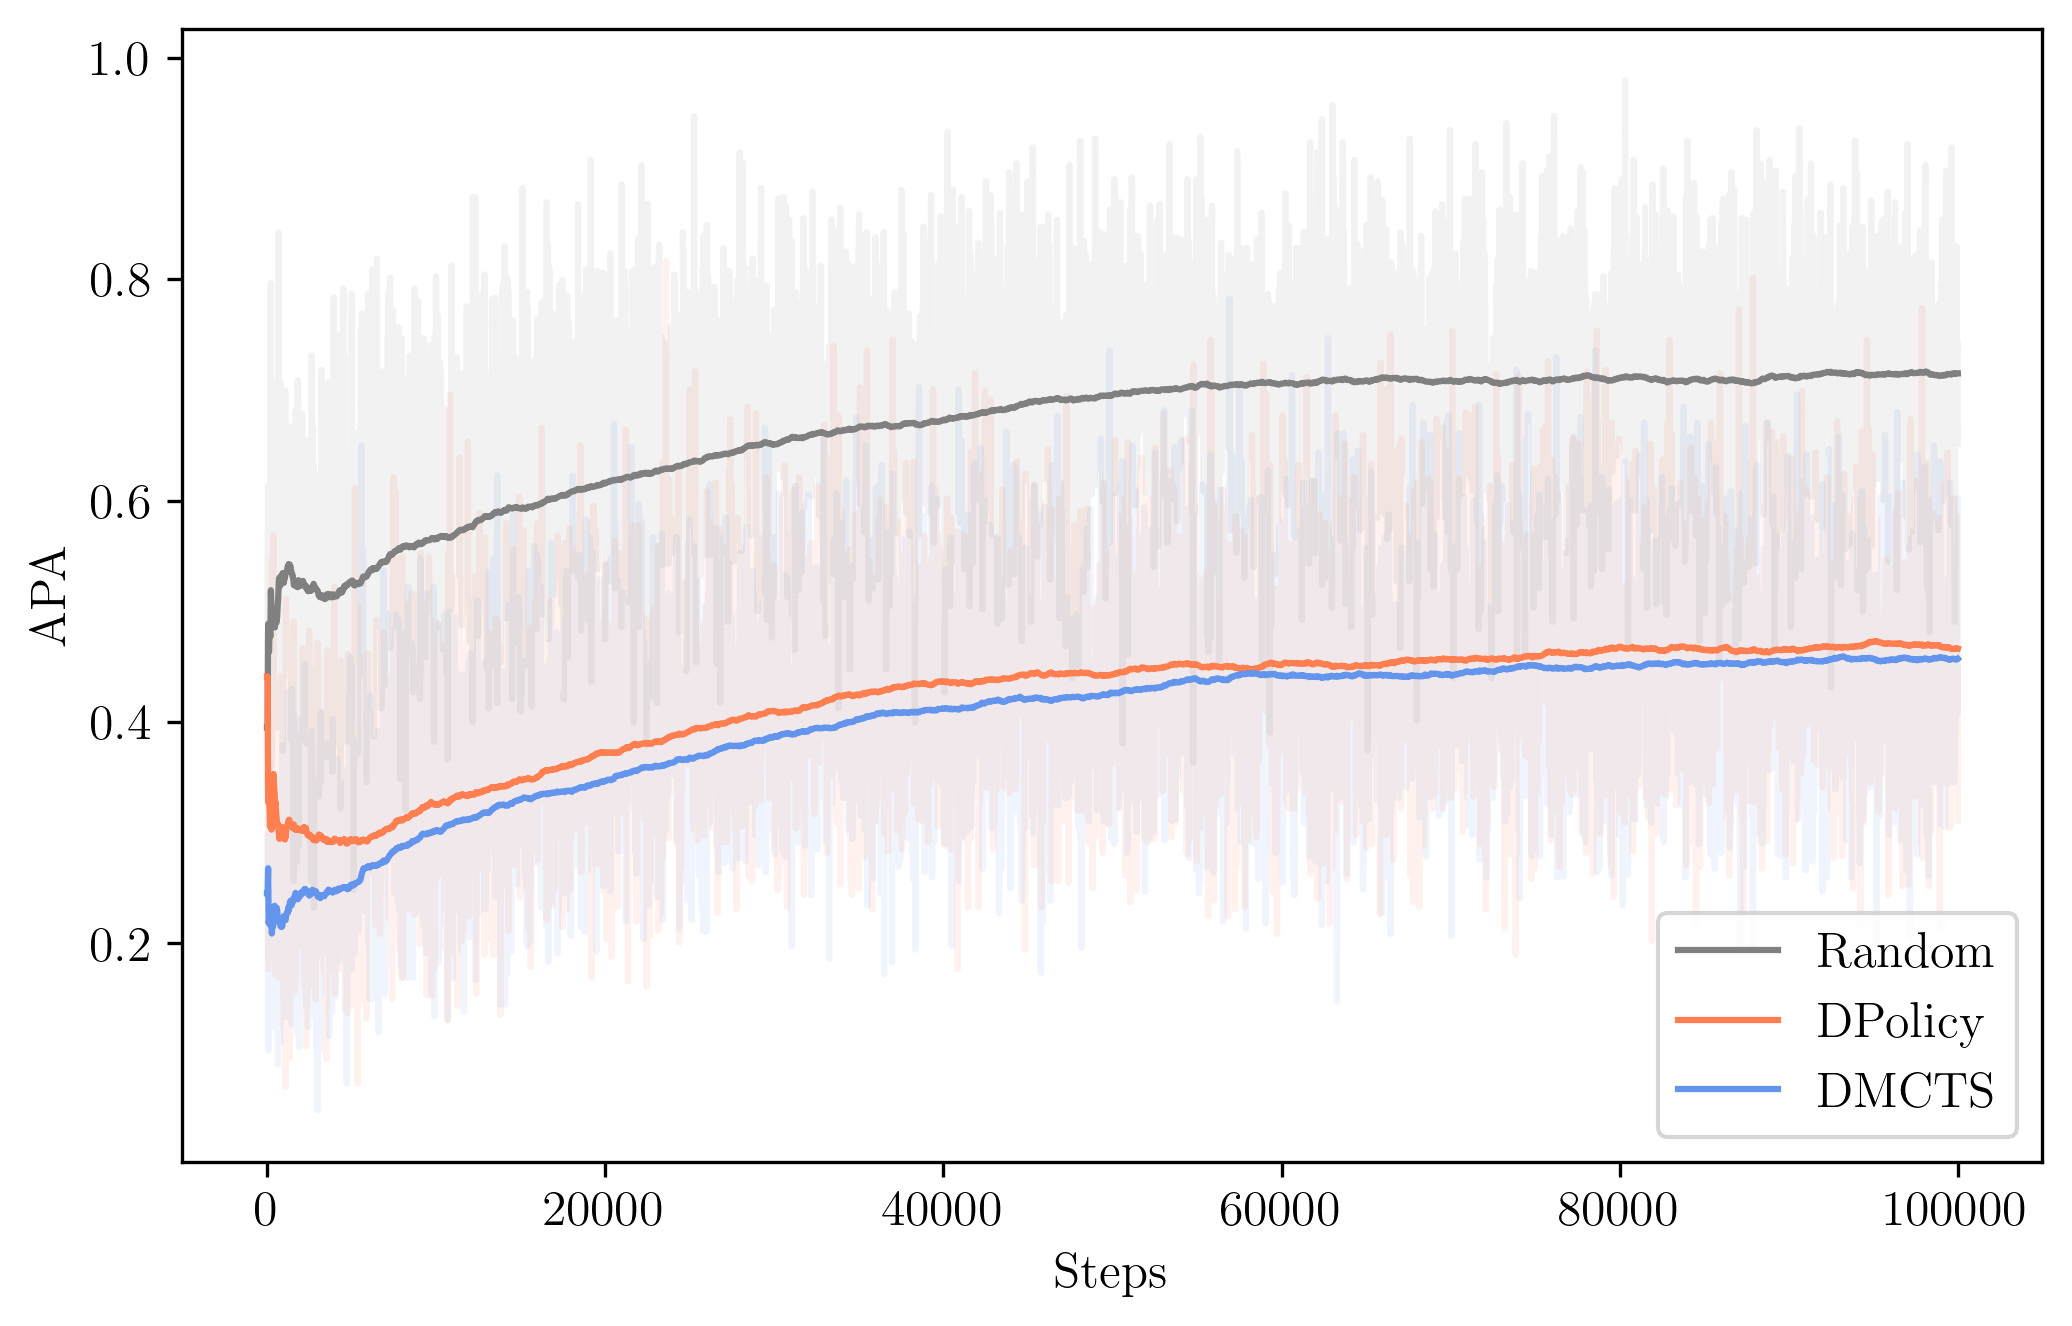

In [5]:
plt.figure(dpi=300, figsize=(8, 5))


df.apa_dmcts.plot(alpha=0.1, c="cornflowerblue", label='')
df.apa_dpolicy.plot(alpha=0.1, c="coral", label='')
df.apa_random.plot(alpha=0.1, c="gray", label='')

df.apa_random.ewm(alpha=0.0001, adjust=True).mean().plot(c="gray", label='Random')
df.apa_dpolicy.ewm(alpha=0.0001, adjust=True).mean().plot(c="coral", label='DPolicy')
df.apa_dmcts.ewm(alpha=0.0001, adjust=True).mean().plot(c="cornflowerblue", label='DMCTS')


plt.xlabel("Steps"), plt.ylabel("APA")
plt.legend()